In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

import torchvision.transforms as T
from collections import defaultdict


In [4]:
data_path = '/root/dev/cv_team5/data/'

In [13]:
train_list = pd.read_csv(data_path + 'train.csv')
meta = pd.read_csv(data_path + 'meta.csv')

In [19]:
train_eda_set = pd.merge(train_list, meta, on = 'target', how = 'left')

In [24]:
train_eda_set

,ID,target,class_name
0,002f99746285dfdd.jpg,16,vehicle_registration_plate
1,008ccd231e1fea5d.jpg,10,payment_confirmation
2,008f5911bfda7695.jpg,10,payment_confirmation
3,009235e4c9c07af5.jpg,4,diagnosis
4,00b2f44967580c74.jpg,16,vehicle_registration_plate
...,...,...,...
1565,fed9e9ec4a77bc06.jpg,4,diagnosis
1566,feeade617aa68c45.jpg,7,medical_outpatient_certificate
1567,ff51dd281a8423f1.jpg,11,pharmaceutical_receipt
1568,ff8a6a251ce51c95.jpg,5,driver_lisence


### **1. 각 클래스 별 분포 확인**

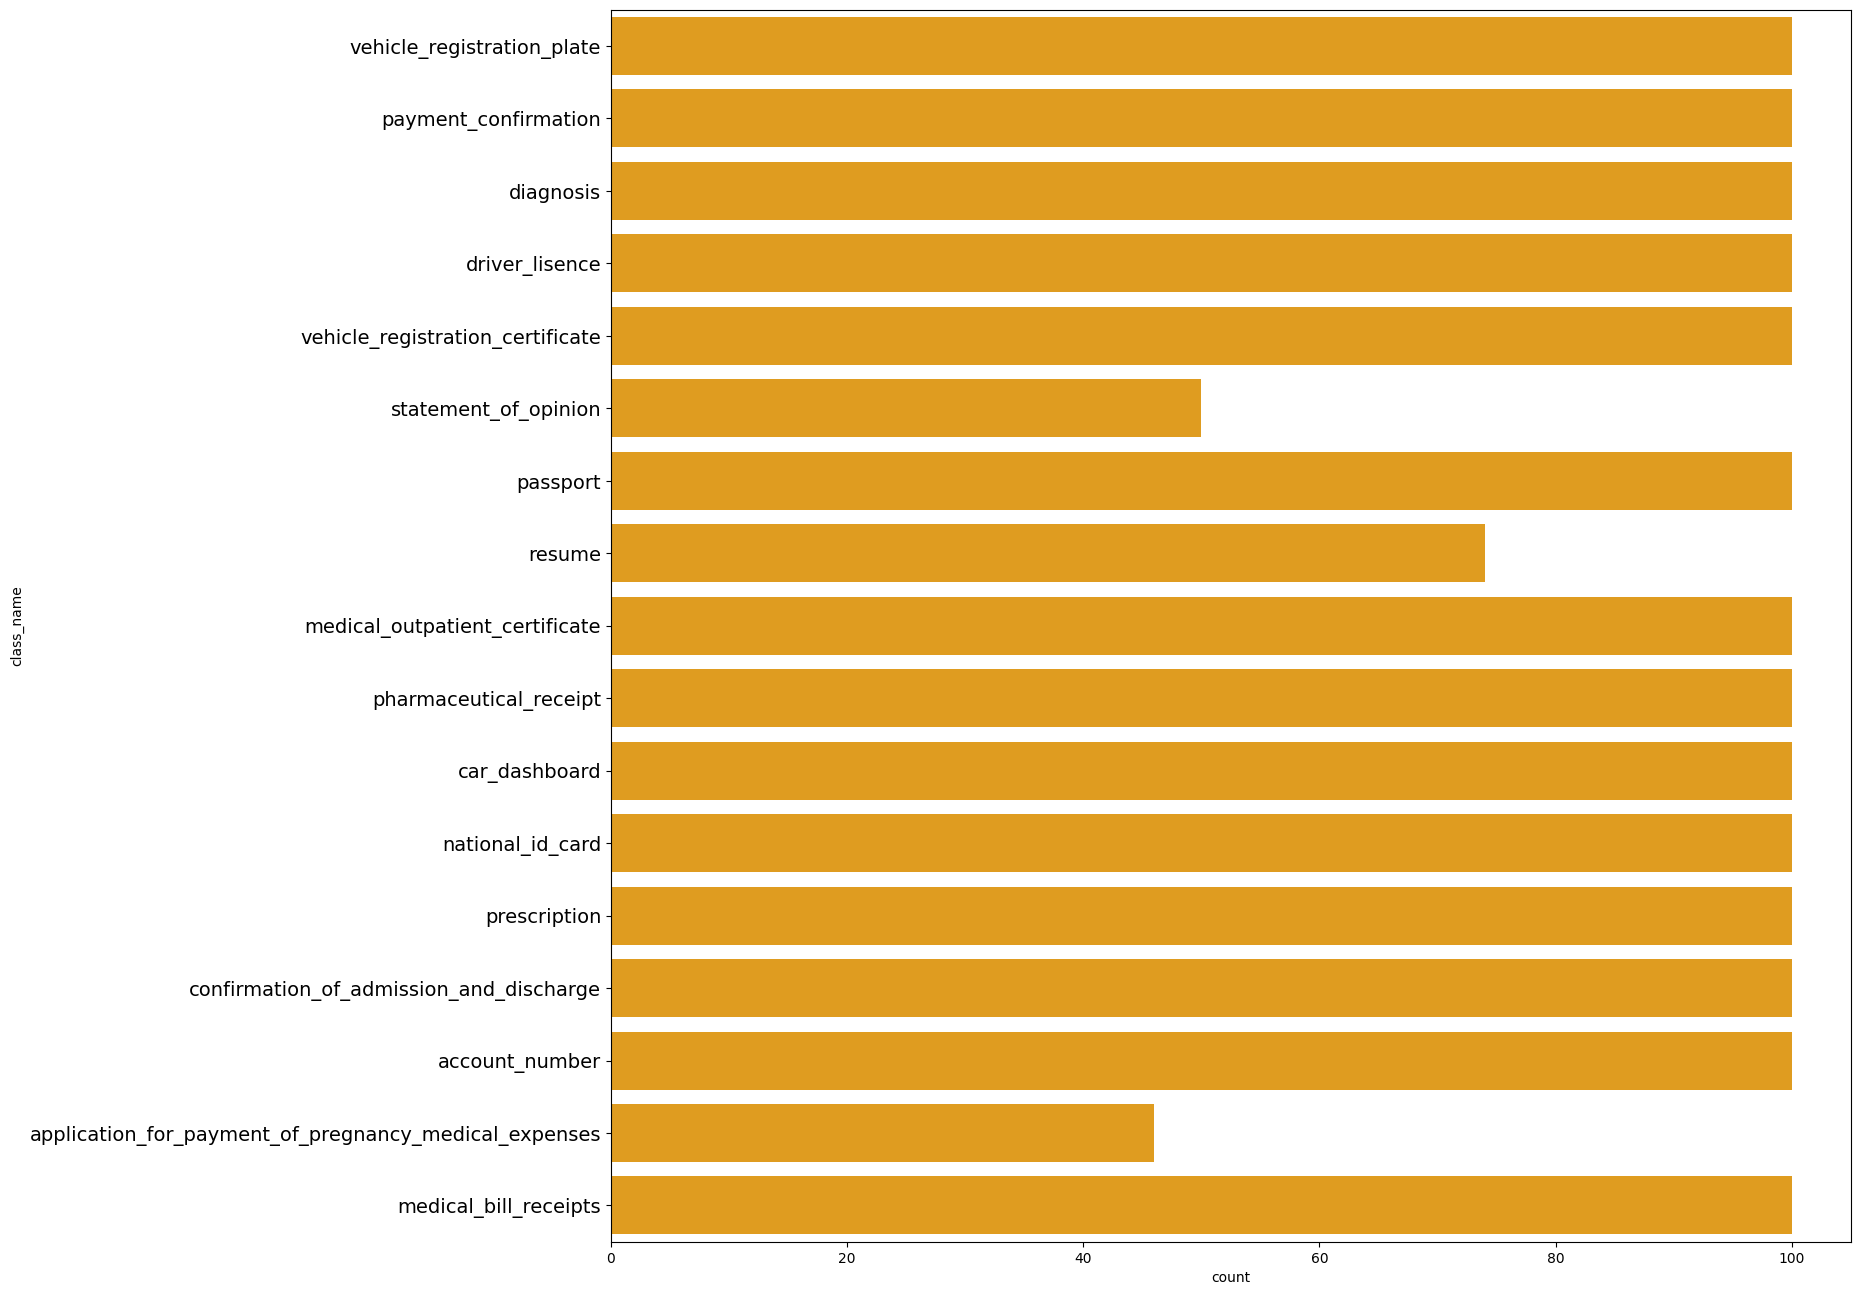

In [47]:

plt.figure(figsize = (16,16))
sns.countplot(data = train_eda_set, y = 'class_name', color = 'orange')
plt.yticks(fontsize = 14)
plt.xticks()
plt.show()

 일부 클래스 application for payment of pregnancy medical expenses(임신 의료비 지급 신청서), resume(이력서), statement of opnion(의견서)가 다른 클래스가 100인것에 비해 상대적으로 적은 값을 가지고 있는 것을 확인 할 수 있다.

> 이를 통해 소수 클래스에 해당하는 클래스를 oversampling or class weight를 고려 할 수 있다. 

### **2. 이미지 크기 & 비율**

In [73]:
target ,heights, widths, ratios = [], [], [], []

for ind, value in train_eda_set.iterrows():
    target.append(value['target'])
    img = np.array(Image.open(os.path.join(data_path,'train', value['ID'])))
    h, w = img.shape[:2]
    heights.append(h)
    widths.append(w)
    ratios.append(w/h)

In [81]:
temp = pd.DataFrame({'heights':heights,
              'widths':widths,
              'ratios':ratios})
train_eda_set = pd.concat([temp, train_eda_set], axis = 1)

In [82]:
train_eda_set

,heights,widths,ratios,ID,target,class_name
0,591,443,0.749577,002f99746285dfdd.jpg,16,vehicle_registration_plate
1,591,443,0.749577,008ccd231e1fea5d.jpg,10,payment_confirmation
2,591,443,0.749577,008f5911bfda7695.jpg,10,payment_confirmation
3,591,443,0.749577,009235e4c9c07af5.jpg,4,diagnosis
4,591,443,0.749577,00b2f44967580c74.jpg,16,vehicle_registration_plate
...,...,...,...,...,...,...
1565,591,443,0.749577,fed9e9ec4a77bc06.jpg,4,diagnosis
1566,591,443,0.749577,feeade617aa68c45.jpg,7,medical_outpatient_certificate
1567,443,591,1.334086,ff51dd281a8423f1.jpg,11,pharmaceutical_receipt
1568,362,722,1.994475,ff8a6a251ce51c95.jpg,5,driver_lisence


### **3. 채널/밝기/대비**

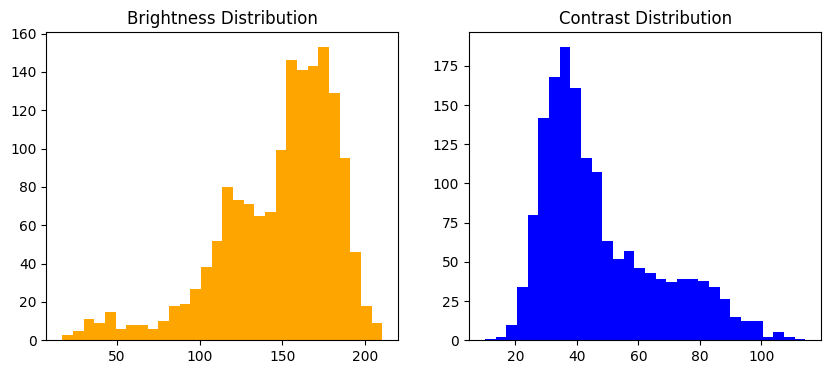

In [83]:
brightness_list = []
contrast_list = []

for idx, value in train_eda_set.iterrows():   # 앞 100장만 예시
    path = os.path.join(data_path, 'train',value['ID'])
    img = Image.open(path).convert("L")
    arr = np.array(img)
    brightness_list.append(np.mean(arr))
    contrast_list.append(np.std(arr))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(brightness_list, bins=30, color="orange")
plt.title("Brightness Distribution")

plt.subplot(1,2,2)
plt.hist(contrast_list, bins=30, color="blue")
plt.title("Contrast Distribution")
plt.show()

왼쪽은 밝기(Brightness) 픽셀 평균값, 오른쪽은 대비(Contrast) 픽셀 표준편차를 의미한다.

> 1. 밝기(Brightness) : ⬆ 전체적으로 밝은 이미지를 의미, ⬇ 전체적으로 어두운 이미지를 의미
> 2. 대비(Contrast) : ⬆ 흑백차가 뚜렷하여 글씨, 경계선이 확실함을 의미, ⬇ 경계선이 불분명하고 흐림

In [86]:
train_eda_set

,heights,widths,ratios,ID,target,class_name
0,591,443,0.749577,002f99746285dfdd.jpg,16,vehicle_registration_plate
1,591,443,0.749577,008ccd231e1fea5d.jpg,10,payment_confirmation
2,591,443,0.749577,008f5911bfda7695.jpg,10,payment_confirmation
3,591,443,0.749577,009235e4c9c07af5.jpg,4,diagnosis
4,591,443,0.749577,00b2f44967580c74.jpg,16,vehicle_registration_plate
...,...,...,...,...,...,...
1565,591,443,0.749577,fed9e9ec4a77bc06.jpg,4,diagnosis
1566,591,443,0.749577,feeade617aa68c45.jpg,7,medical_outpatient_certificate
1567,443,591,1.334086,ff51dd281a8423f1.jpg,11,pharmaceutical_receipt
1568,362,722,1.994475,ff8a6a251ce51c95.jpg,5,driver_lisence


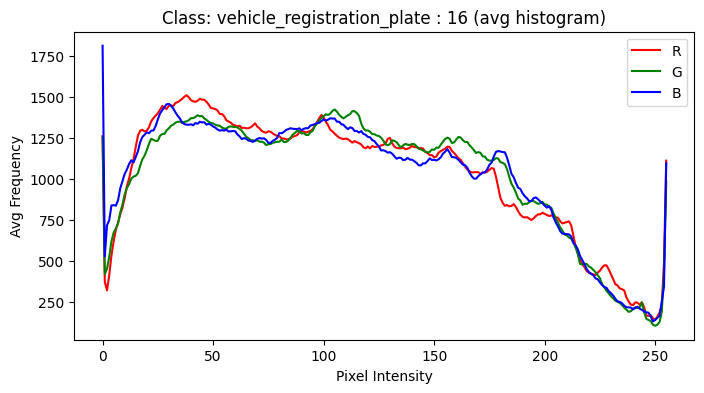

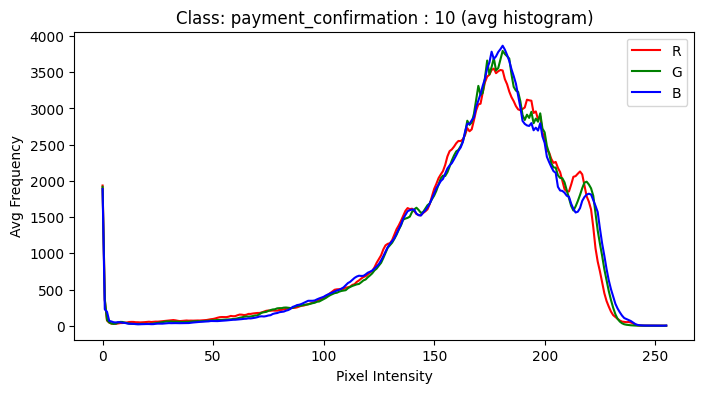

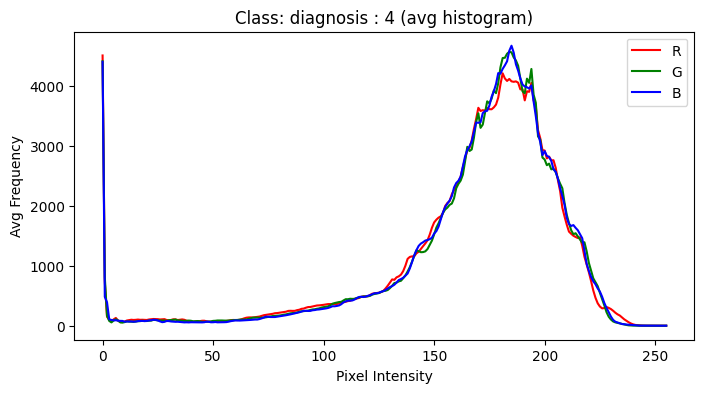

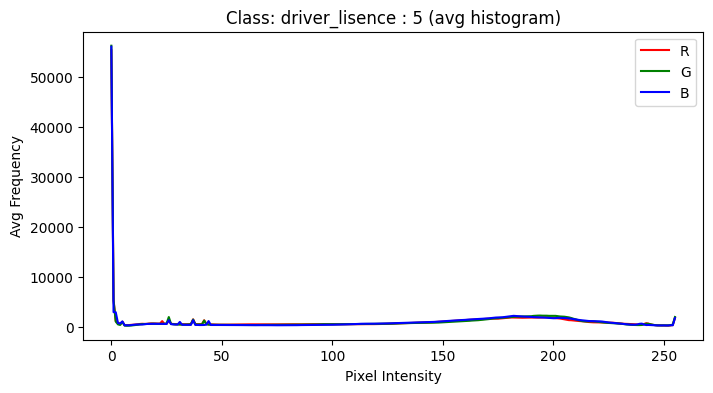

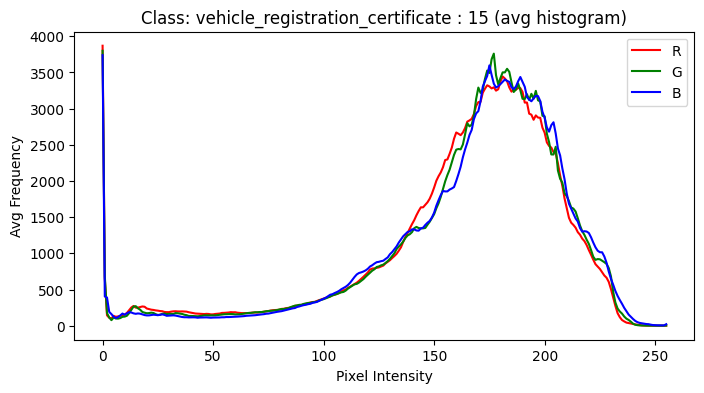

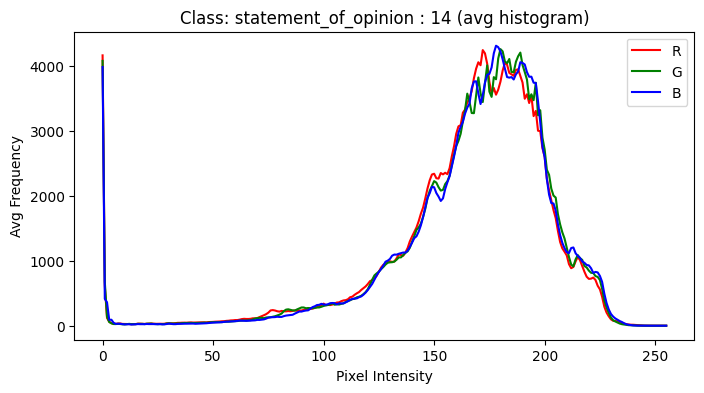

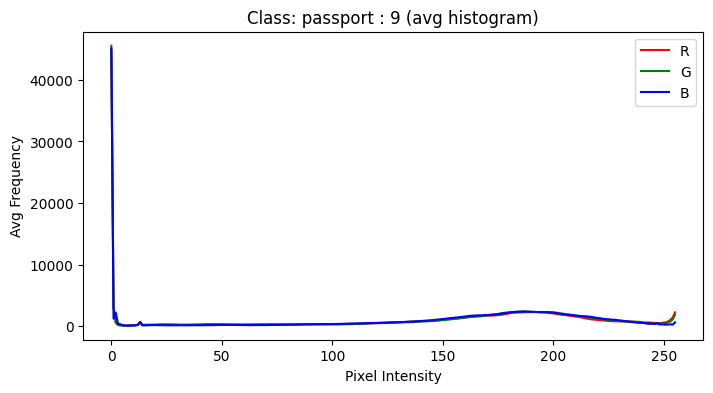

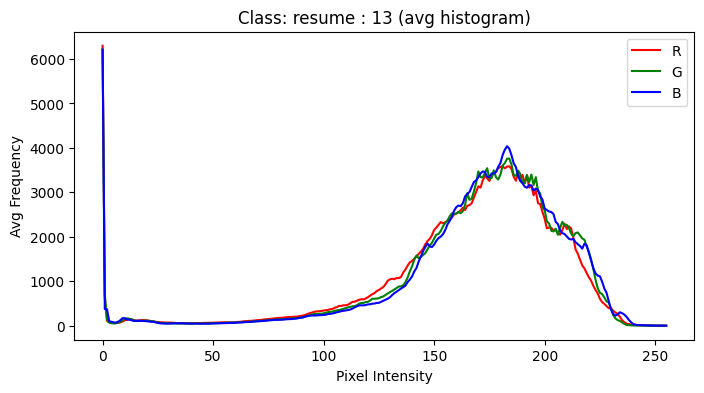

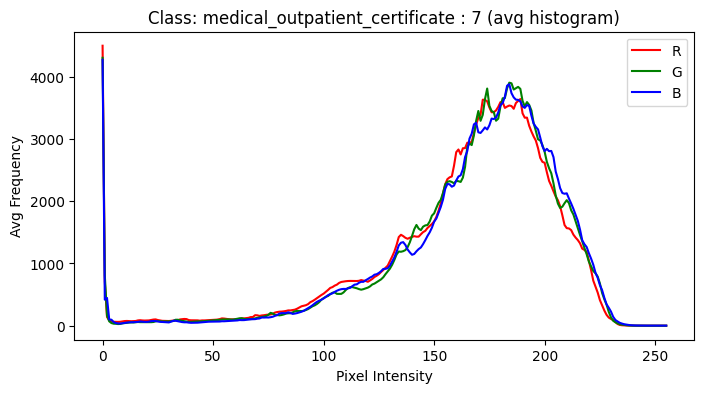

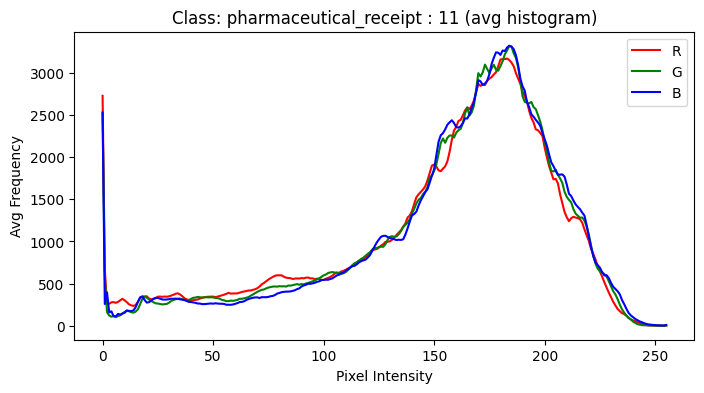

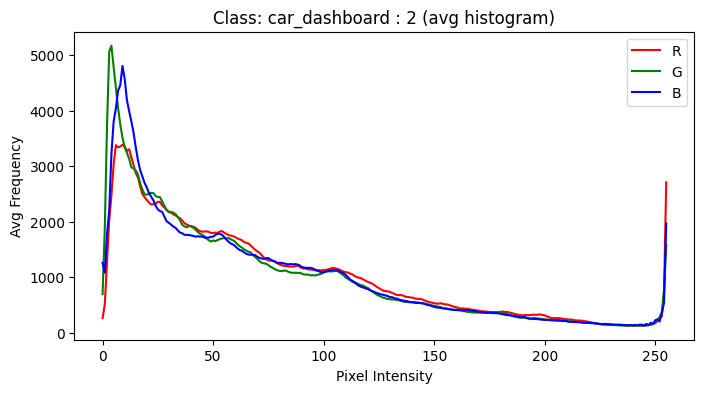

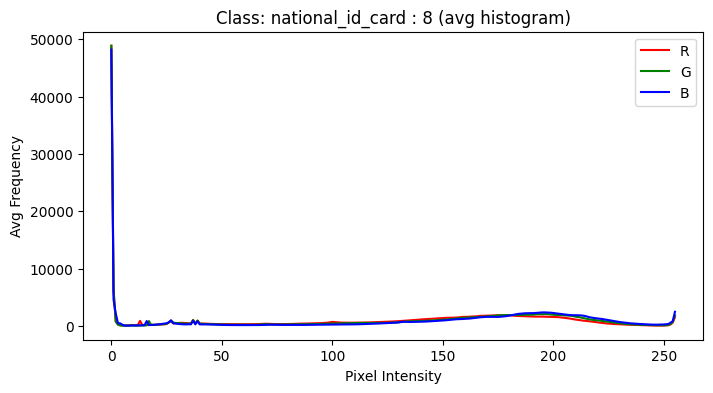

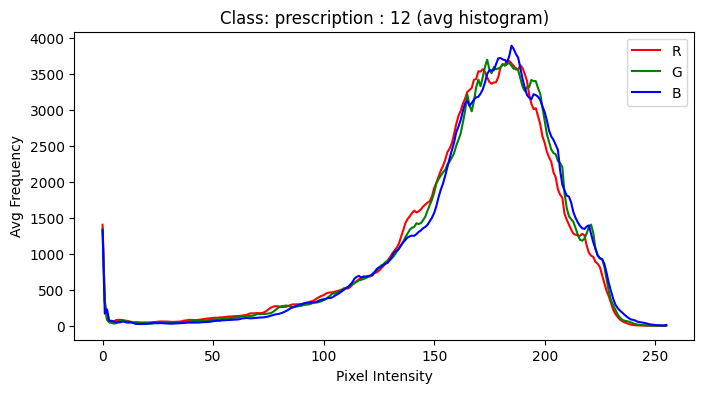

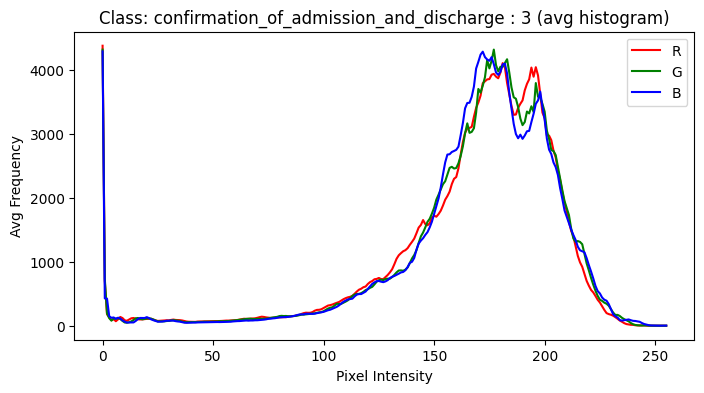

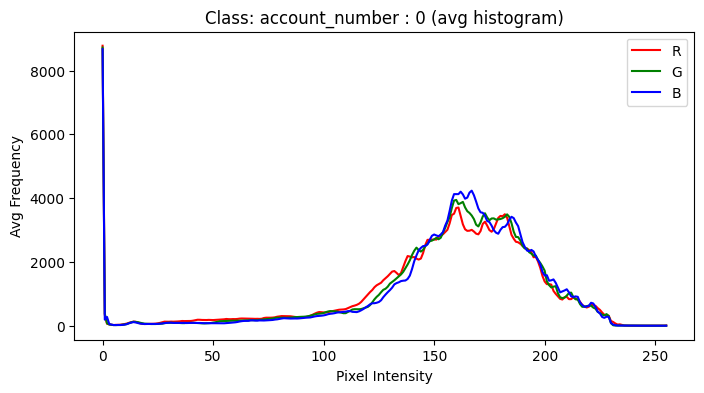

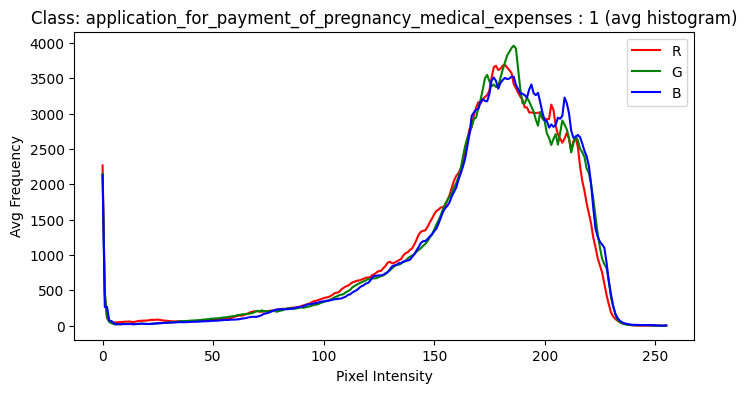

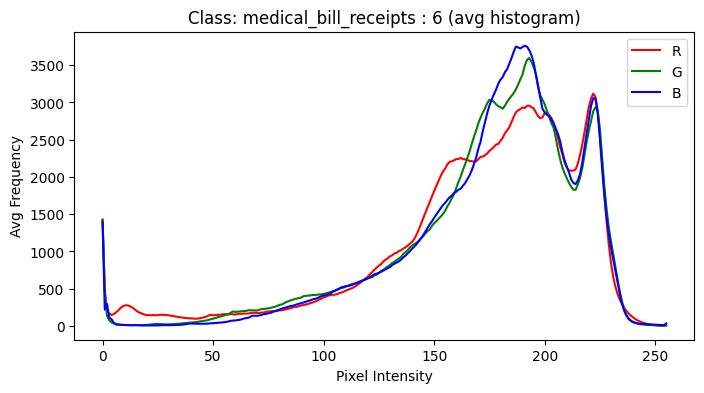

In [89]:
# 클래스별 히스토그램 저장용
class_hist = defaultdict(lambda: {"r": np.zeros(256), "g": np.zeros(256), "b": np.zeros(256)})
class_counts = defaultdict(int)

for idx, values in train_eda_set.iterrows():
    path = os.path.join(data_path,'train',values['ID'])
    label = values['class_name'] + ' : ' + str(values['target'])
    
    img = Image.open(path).convert("RGB")
    arr = np.array(img)

    for i, col in enumerate(("r","g","b")):
        hist, _ = np.histogram(arr[:,:,i].ravel(), bins=256, range=(0,256))
        class_hist[label][col] += hist  # 누적합
    class_counts[label] += 1

# 평균 히스토그램 계산
for label in class_hist:
    for col in ("r","g","b"):
        class_hist[label][col] /= class_counts[label]

# 시각화 (예: 특정 클래스 3개만)
sample_classes = list(class_hist.keys())
for c in sample_classes:
    plt.figure(figsize=(8,4))
    for col in ("r","g","b"):
        plt.plot(class_hist[c][col], color=col, label=f"{col.upper()}")
    plt.title(f"Class: {c} (avg histogram)")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Avg Frequency")
    plt.legend()
    plt.show()


1. 유사한 분포를 지니는 데이터들의 그룹들이 보여짐 민감정보가 포함되는 cutout되어지는 이미지들은 0이 많은 분포를 띄는것으로 생각됨
2. 차량 계기판의 분포는 다른 분포들과는 다르게 흰색을 나타내는 255가 다른 class에 비해 많은 것으로 보아 빛이 반사되는 것이 사진에 담겨 생긴 분포모양이라고 생각됨 
